In [1]:
%matplotlib inline

import numpy as np

import menpo.io as mio
from menpo.image import Image
from menpo.visualize import visualize_images

from alaborticcv2015.deepconvkernel.loggabor import LogGaborLDCN
from alaborticcv2015.utils import centralize, normalize_norm, normalize_std

# Log-Gabor LDCN 

Choose whether to work with color or greyscale images:

In [2]:
color = False

if color:
    n_channels = 3
else:
    n_channels = 1

Build a Log-Gabor LinDeepConvNet with default parameters:

In [21]:
net = LogGaborLDCN(n_layers=2, architecture=3, normalize_filters=centralize, patch_shape=(7, 7))
net.build_network(n_channels=n_channels)

In [22]:
print '# of layers:', net.n_layers
print '# of filters:', net.n_filters
print '# of filters per layer:', net.n_filters_layer
print 'filters shape:', net.filters_shape

# of layers: 2
# of filters: 48
# of filters per layer: [24, 24]
filters shape: (7, 7)


Visualize the previous filters using the previous LinDeepConvNet:

In [55]:
filters = net.filters_spatial(type='imag')

First layer spatial filters:

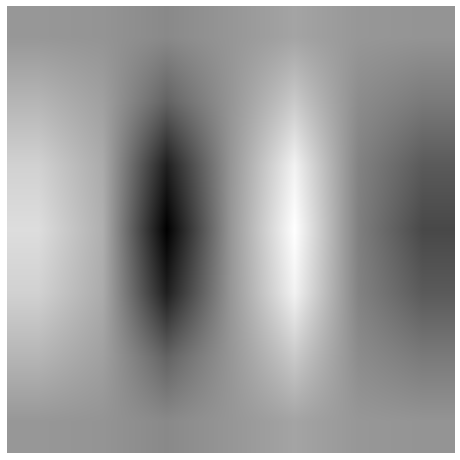

In [56]:
visualize_images(filters[0])

Second layer spatial filters:

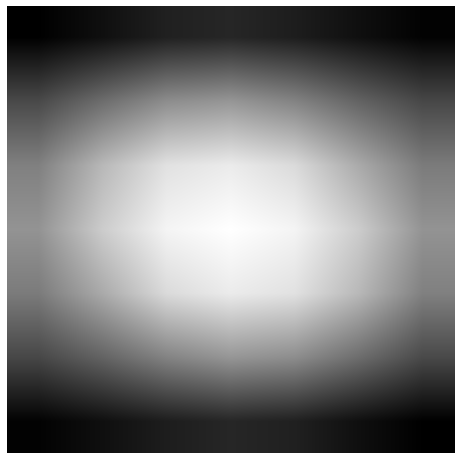

In [25]:
visualize_images(filters[1])

We can also visualize the previous filters on the frequency domain:

In [50]:
filters_frequecy = net.filters_frequency(ext_shape=(50,50))

First layer filters in the frequency domain:

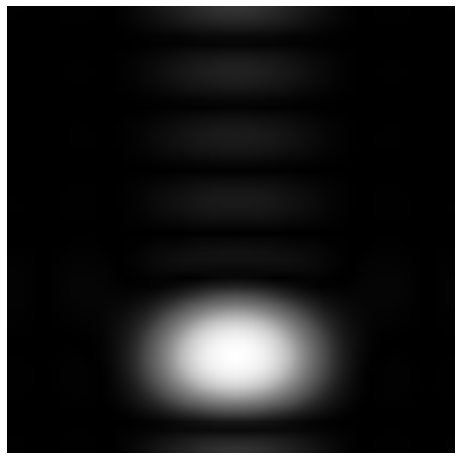

In [51]:
visualize_images(filters_frequecy[0])

Second layer filters in the frequency domain:

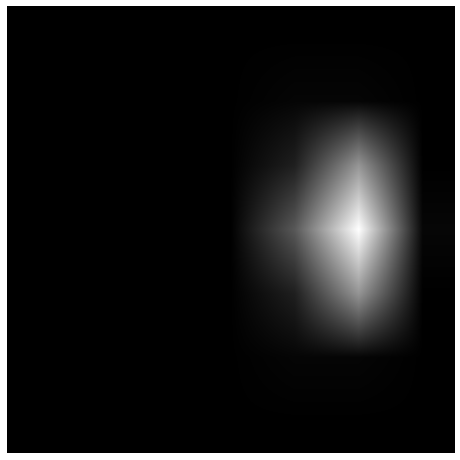

In [28]:
visualize_images(filters_frequecy[1])

Visualize Deep Convolutional Kernels:

In [29]:
kernels = net.kernels_spatial()

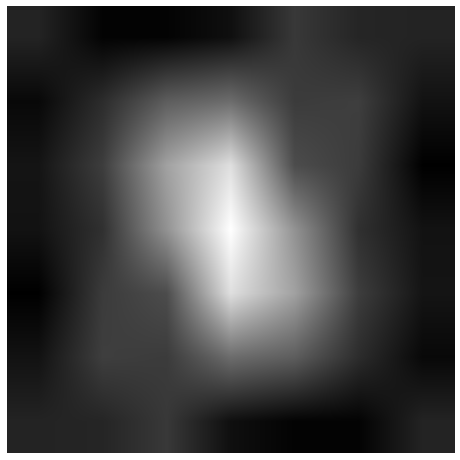

In [30]:
visualize_images(kernels)

In [44]:
kernels = net.kernels_frequency(ext_shape=(100, 100), type=None)

TypeError: Image data can not convert to float

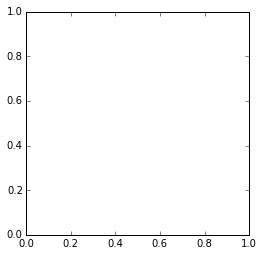

In [43]:
visualize_images(kernels)

Load images:

In [33]:
images = []
for i in mio.import_images('/Users/joan/PhD/DataBases/faces/lfpw/trainset/', verbose=True, 
                           max_images=10):
    i.crop_to_landmarks_proportion_inplace(1)
    i = i.rescale_landmarks_to_diagonal_range(100)
    if not color:
        if i.n_channels == 3:
            i = i.as_greyscale(mode='average')
    images.append(i)

- Loading 10 assets: [====================] 100%

Choose one of the previous images:

In [34]:
image = images[1]

Compute network features:

TypeError: Image data can not convert to float

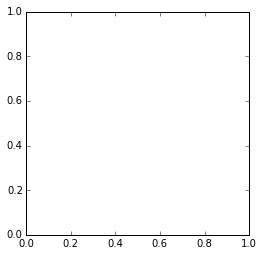

In [35]:
net.network_response(images[0]).view_widget()

Compute deep convolutional kernel features:

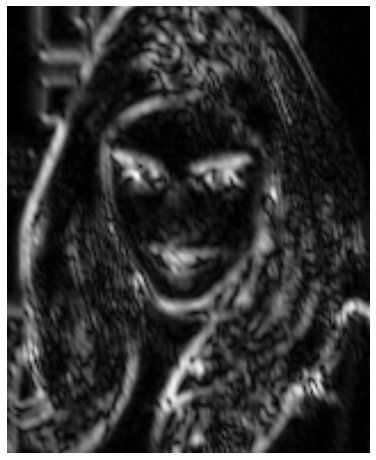

In [36]:
Image(np.abs(net.kernel_response(images[0]).pixels)).view_widget()

Check Network and Kernel equivalence:

In [49]:
network_r = net.network_response(images[0], hidden_mode='same', visible_mode='same', boundary='symmetric')
kernel_r = net.kernel_response(images[0], mode='same', boundary='symmetric')

print network_r.as_vector().conj().dot(network_r.as_vector())
print kernel_r.as_vector().conj().dot(kernel_r.as_vector())

(614.318056158+0j)
(622.238146989+0j)
